**1- Camera Calibration**

The distortion caused by the camera lens distorts the photos and is troublesome for 3D reconstruction. So we have to correct them before doing the 3D recostruction. Before making any corrections, we need to know the internal settings of the camera we are using. OpenCV offers calibration algorithms capable of determining these parameters.

The camera calibration operation amounts to modeling the process of image formation, i.e. finding the relation between the spatial coordinates of a point in space with the associated point in the image taken by the camera.

In this tutorial, you need Python 3.7, OpenCV 3.4.2.17, Numpy and Pillow.

In [ ]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 146kB/s 
     |████████████████████████████████| 14.5MB 174kB/s 
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:


In [ ]:
import cv2
import numpy as np 
import glob
from tqdm import tqdm
import PIL.ExifTags
import PIL.Image
from matplotlib import pyplot as plt 

The process of calibrating a camera in OpenCV consists in making the computer scan a picture with a chessboard pattern and identify the internal corners several times with different pictures. 


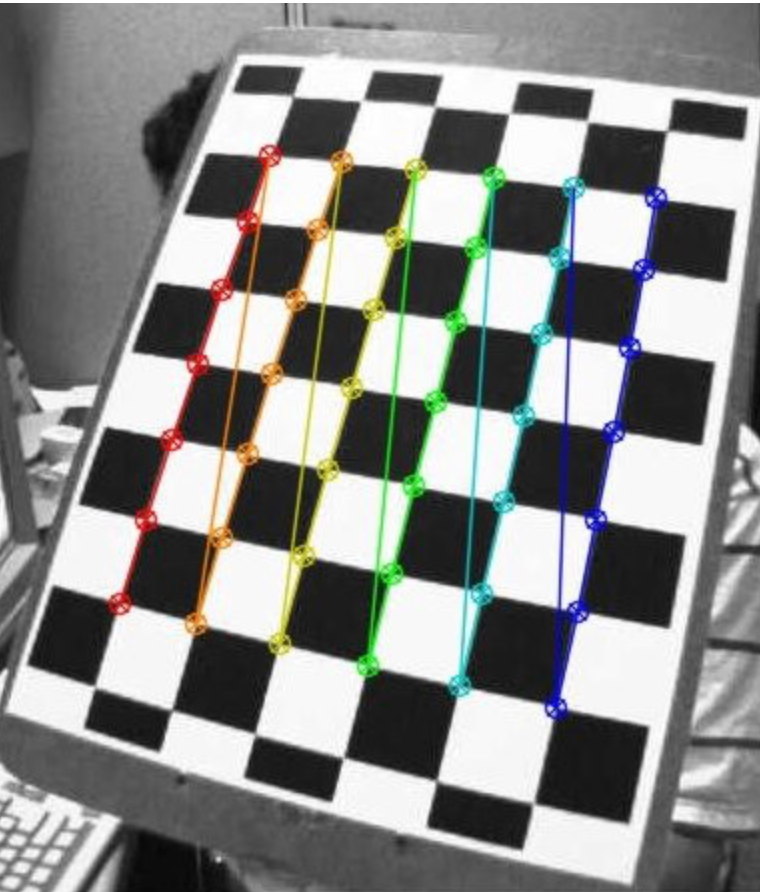

Go to this [link](https://docs.opencv.org/2.4/_downloads/pattern.png) and print this chessboard pattern on a piece of paper. Glue the chessboard to a flat and solid object. 
The first step will be to read Images of a chess board. It’s recommended to use at least 20 images to get a reliable calibration, For this, Take at least 20 images by your camera you want to calibrate. They should be in different angles and distances because the calibration code needs various points with different perspectives. Some examples:


> Bloc en retrait



In [ ]:
!unzip Images.zip

In [ ]:
!unzip calibration_images2.zip

Archive:  calibration_images2.zip
warning [calibration_images2.zip]:  30292916 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  30292916
  (attempting to re-compensate)
   creating: calibration_images2/
  inflating: calibration_images2/IMG_7769.JPG  
  error:  invalid compressed data to inflate
file #3:  bad zipfile offset (local header sig):  1439713
  (attempting to re-compensate)
file #3:  bad zipfile offset (local header sig):  1439713
file #4:  bad zipfile offset (local header sig):  33212446
file #5:  bad zipfile offset (local header sig):  34618064
file #6:  bad zipfile offset (local header sig):  36085750
file #7:  bad zipfile offset (local header sig):  37505709
file #8:  bad zipfile offset (local header sig):  39019736
file #9:  bad zipfile offset (local header sig):  40429648
file #10:  bad zipfile offset (local header sig):  41840984
file #11:  bad zipfile offset (local header sig):  43251766
file 

Open CV helps to automatically detect the corners and draw on it by findChessboardCorners() and drawChessboardCorners()
Applying both functions to a sample image, results:
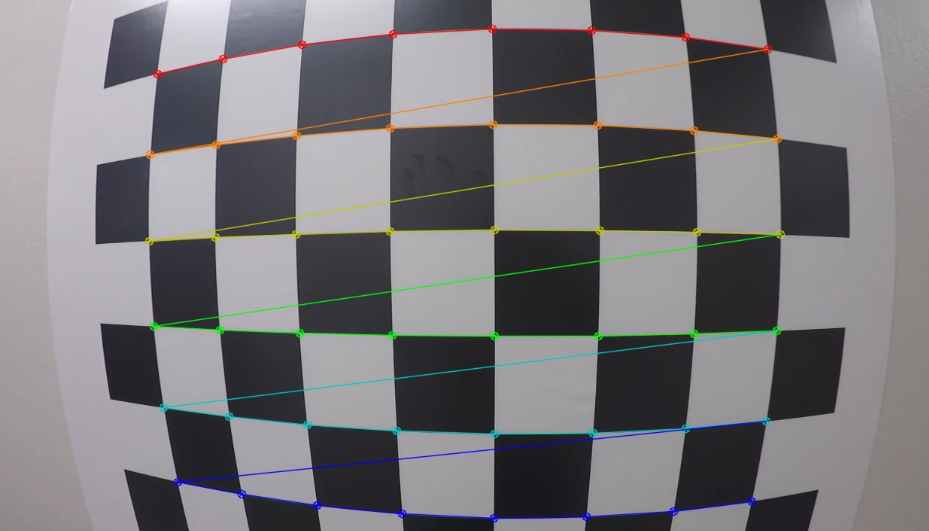

 Move the images into a directory "./Images" and start the preprocessing of the image (corner detection). 

In [ ]:
#============================================
# Camera calibration
#============================================

#Define size of chessboard target. 

chessboard_size = (7,5)

#Define arrays to save detected points
obj_points = [] #3D points in real world space 
img_points = [] #3D points in image plane

#Prepare grid and points to display

objp = np.zeros((np.prod(chessboard_size),3),dtype=np.float32)


objp[:,:2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1,2)

#read images

calibration_paths = glob.glob('./Images/*')

#Iterate over images to find intrinsic matrix
for image_path in tqdm(calibration_paths):

	#Load image
	image = cv2.imread(image_path)
	gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	print("Image loaded, Analizying...")
	#find chessboard corners
	ret,corners = cv2.findChessboardCorners(gray_image, chessboard_size, None)

	if ret == True:
		print("Chessboard detected!")
		print(image_path)
		#define criteria for subpixel accuracy
		criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
		#refine corner location (to subpixel accuracy) based on criteria.
		cv2.cornerSubPix(gray_image, corners, (5,5), (-1,-1), criteria)
		obj_points.append(objp)
		img_points.append(corners)


  0%|          | 0/22 [00:00<?, ?it/s]

Image loaded, Analizying...


  5%|▍         | 1/22 [00:15<05:34, 15.95s/it]

Chessboard detected!
./Images/IMG_7830.JPG
Image loaded, Analizying...


  9%|▉         | 2/22 [00:34<05:32, 16.64s/it]

Chessboard detected!
./Images/IMG_7832.JPG
Image loaded, Analizying...


 14%|█▎        | 3/22 [00:49<05:06, 16.12s/it]

Chessboard detected!
./Images/IMG_7829.JPG
Image loaded, Analizying...


 18%|█▊        | 4/22 [02:36<13:01, 43.43s/it]

Image loaded, Analizying...


 23%|██▎       | 5/22 [02:50<09:49, 34.68s/it]

Chessboard detected!
./Images/IMG_7813.JPG
Image loaded, Analizying...


 27%|██▋       | 6/22 [03:42<10:36, 39.76s/it]

Chessboard detected!
./Images/IMG_7812.JPG
Image loaded, Analizying...


 32%|███▏      | 7/22 [04:19<09:47, 39.14s/it]

Chessboard detected!
./Images/IMG_7826.JPG
Image loaded, Analizying...


 36%|███▋      | 8/22 [05:27<11:06, 47.61s/it]

Image loaded, Analizying...


 41%|████      | 9/22 [07:01<13:21, 61.65s/it]

Image loaded, Analizying...


 45%|████▌     | 10/22 [07:16<09:32, 47.67s/it]

Chessboard detected!
./Images/IMG_7810.JPG
Image loaded, Analizying...


 50%|█████     | 11/22 [09:11<12:27, 67.94s/it]

Image loaded, Analizying...


 55%|█████▍    | 12/22 [09:27<08:42, 52.22s/it]

Chessboard detected!
./Images/IMG_7808.JPG
Image loaded, Analizying...


 59%|█████▉    | 13/22 [11:38<11:22, 75.83s/it]

Image loaded, Analizying...


 64%|██████▎   | 14/22 [13:14<10:55, 81.88s/it]

Image loaded, Analizying...


 68%|██████▊   | 15/22 [14:23<09:07, 78.17s/it]

Image loaded, Analizying...


 73%|███████▎  | 16/22 [16:15<08:48, 88.14s/it]

Image loaded, Analizying...


 77%|███████▋  | 17/22 [16:29<05:30, 66.00s/it]

Chessboard detected!
./Images/IMG_7822.JPG
Image loaded, Analizying...


 82%|████████▏ | 18/22 [16:44<03:22, 50.58s/it]

Chessboard detected!
./Images/IMG_7809.JPG
Image loaded, Analizying...


 86%|████████▋ | 19/22 [16:55<01:56, 38.92s/it]

Chessboard detected!
./Images/IMG_7823.JPG
Image loaded, Analizying...


 91%|█████████ | 20/22 [18:29<01:50, 55.43s/it]

Chessboard detected!
./Images/IMG_7837.JPG
Image loaded, Analizying...


 95%|█████████▌| 21/22 [18:44<00:43, 43.25s/it]

Chessboard detected!
./Images/IMG_7811.JPG
Image loaded, Analizying...


100%|██████████| 22/22 [18:49<00:00, 51.35s/it]

Chessboard detected!
./Images/IMG_7769.JPG


In [ ]:
!mkdir camera_params

We can finally proceed with the calibration of our camera and correction of our images. In order to do this we will use the function cv2.calibrateCamera(). It returns the camera matrix and distortion coefficients including rotation and translation vectors for our extrinsic values.

In [ ]:
#Calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points,gray_image.shape[::-1], None, None)

#Save parameters into numpy file
np.save("./camera_params/ret", ret)
np.save("./camera_params/mtx", mtx)
np.save("./camera_params/dist", dist)
np.save("./camera_params/rvecs", rvecs)
np.save("./camera_params/tvecs", tvecs)

#Calculate projection error. 
mean_error = 0
for i in range(len(obj_points)):
	img_points2, _ = cv2.projectPoints(obj_points[i],rvecs[i],tvecs[i], mtx, dist)
	error = cv2.norm(img_points[i], img_points2, cv2.NORM_L2)/len(img_points2)
	mean_error += error

total_error = mean_error/len(obj_points)
print (total_error)

0.45879539630240757


Now, you can test your calibration by applying the correction for distortion on a test image.

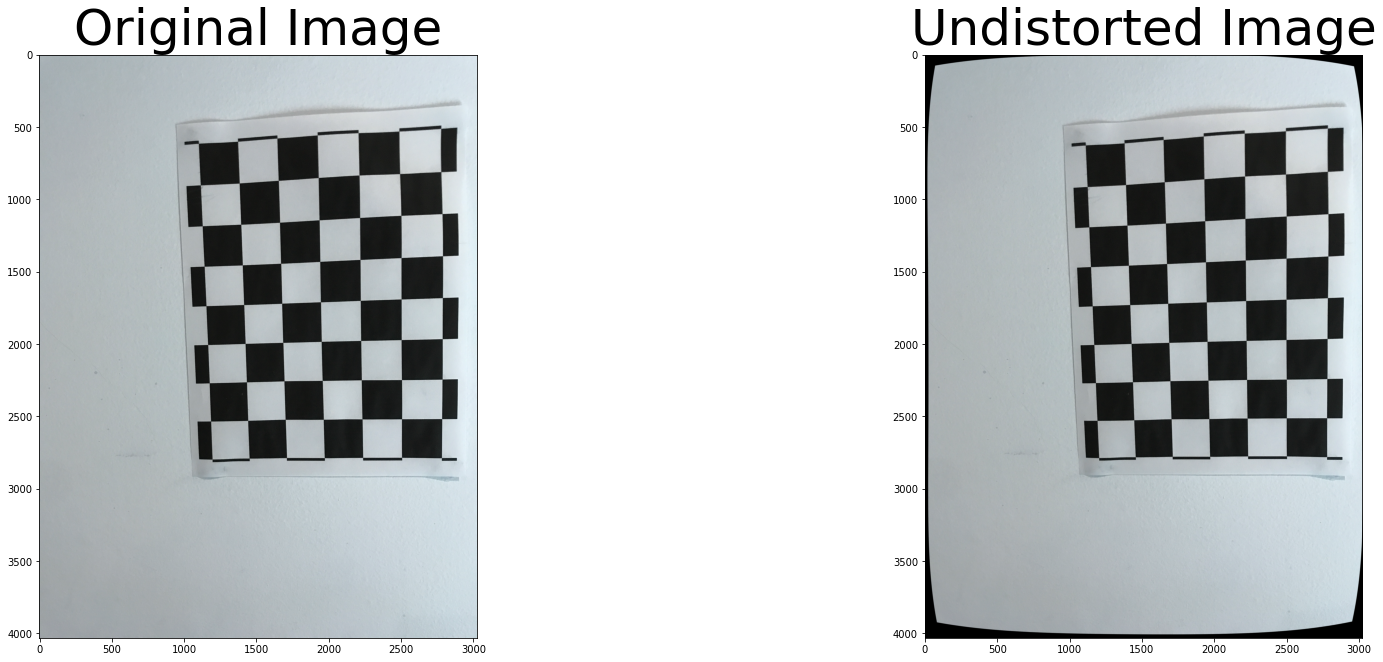

In [ ]:
# Read in an image
img = cv2.imread('Images/IMG_7810.JPG')

undistorted = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


Output result:

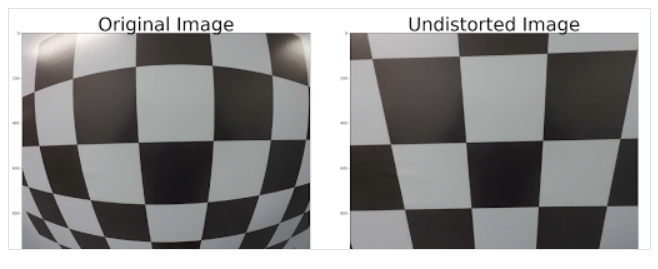

In [ ]:
#Load camera parameters
ret = np.load('./camera_params/ret.npy')
mtx = np.load('./camera_params/mtx.npy')
dist = np.load('./camera_params/dist.npy')

**2- Pose Estimation**

Calibration describes the characteristics of our cameras that are usable by our program, that is; the camera matrix and distortion coefficients. From this information we can take a picture of a patterned image with our camera and calculate how that object is situated in real world space. For an example; we will use the chessboard image and visualize the planar objects relative position by drawing a 3D cube aligned to its orientation.

The goal of this exercise will be to draw an X, Y, Z axis onto our image, positioned at the chessboard’s bottom corner. For this case we will set the Z axis as perpendicular to the patterned object (the axis that points away from the 2D plane of the chess board and toward the camera). 

Write a function that will draw a 3D axis over the image.

In [ ]:
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img

Our next step is to identify the points in 3D space that will be used to help draw our axis. For this example we will create an axis that spans the length of 3 units, or chessboard squares, in each direction. For the Z axis we must denote a negative value which will ensure the axis line drawn will face the camera.

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((5*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:5].T.reshape(-1,2)

axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

First step is to load the image, search for the 7 x 6 grid. If it is found we can calculate its rotation and translation using the function cv2.solvePnPRansac(). Now we project the axis points from points in 3D space to points on the 2D image plane. When the axis is identified we can then use the draw function to visualize its orientation.

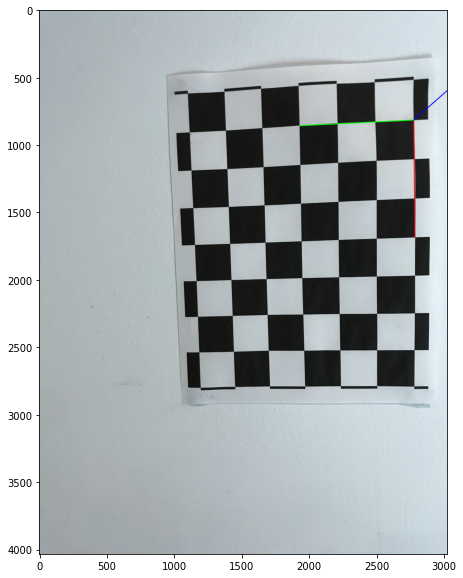

In [ ]:
img = cv2.imread('Images/IMG_7810.JPG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
chessboard_size = (7,5)
ret,corners = cv2.findChessboardCorners(gray, chessboard_size, None)
if ret == True:
  corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
  # Find the rotation and translation vectors.
  _, rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)
  # project 3D points to image plane
  imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)
  img = draw(img,corners2,imgpts)
  figsize = (10, 10)
  plt.figure(figsize=figsize)
  plt.imshow(img)
  plt.show()

Here some examples:
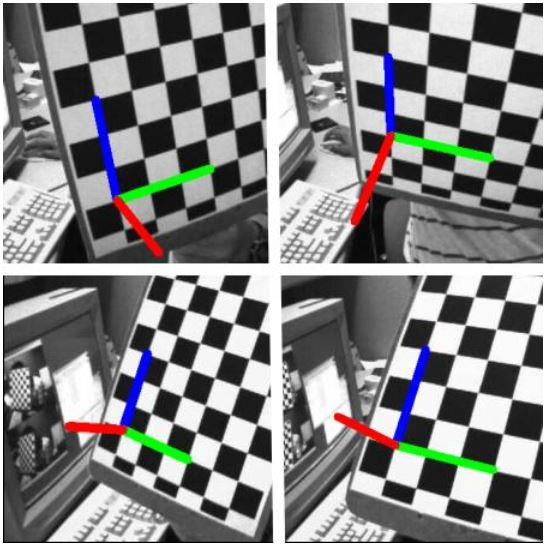

In order to draw a cube we can modify the draw function as follows. A 3 x 3 square will be drawn first, oriented to the bottom left corner and parallel to our chessboard. Then we will add lines extending from this square to complete the cube in the direction that faces the camera.


In [ ]:
def draw(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)

    # draw ground floor in green
    img = cv2.drawContours(img, [imgpts[:4]],-1,(0,255,0),-3)

    # draw pillars in blue color
    for i,j in zip(range(4),range(4,8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)

    # draw top layer in red color
    img = cv2.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)

    return img

The axis points must be modified to include each corner of the cube.

In [ ]:
axis = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],
                   [0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3] ])

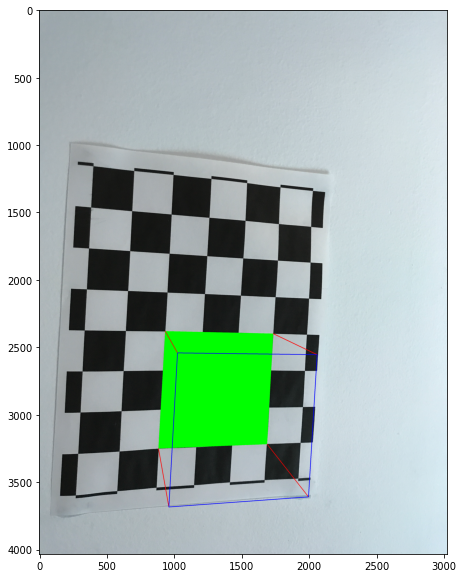

In [ ]:
img = cv2.imread('Images/IMG_7822.JPG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
chessboard_size = (7,5)
ret,corners = cv2.findChessboardCorners(gray, chessboard_size, None)
if ret == True:
  corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)

  # Find the rotation and translation vectors.
  _, rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)

  # project 3D points to image plane
  imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)

  # Draw cube
  img = draw(img,corners2,imgpts)

  figsize = (10, 10)
  plt.figure(figsize=figsize)
  plt.imshow(img)
  plt.show()

result:
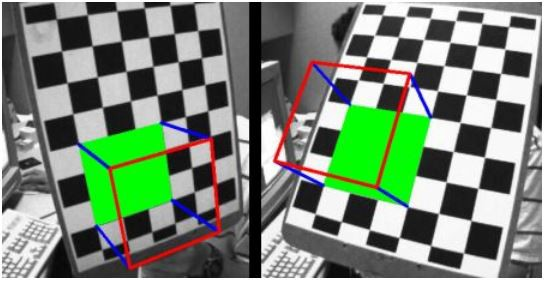

The above exercise can be be usful for the applications for augmented reality. You can includ a 3D object in a real world image that interacts with the object that is pictured, allowing for a dynamic link between the real and virtual worlds.